In [86]:
#Zad 1
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [87]:
# A
df[(df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales) & (df.Year == 2008)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
397,400,Professor Layton and the Unwound Future,DS,2008.0,Puzzle,Nintendo,0.65,1.61,0.82,0.28,3.36
581,586,Style Savvy,DS,2008.0,Simulation,Nintendo,0.63,0.84,0.96,0.19,2.61
2586,2626,Personal Trainer: Walking,DS,2008.0,Sports,Nintendo,0.22,0.32,0.17,0.07,0.79
2964,3008,100 Classic Books,DS,2008.0,Misc,Nintendo,0.13,0.52,0.00,0.02,0.67
3655,3710,Inazuma Eleven,DS,2008.0,Role-Playing,Nintendo,0.00,0.14,0.38,0.02,0.54
11514,11722,Disaster: Day of Crisis,Wii,2008.0,Action,Nintendo,0.00,0.03,0.04,0.00,0.08
15702,15994,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,0.01


In [88]:
# B
df1 = df.groupby("Genre")[["Global_Sales"]].sum()
df1[df1.Global_Sales == df1.Global_Sales.max()]

,Global_Sales
Genre,
Action,1722.84


In [89]:
# C
df2 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].mean()
df2 = df2[df2.JP_Sales > df2.EU_Sales].sort_values(by = "JP_Sales", ascending = False).reset_index()
df2 = df2[["Genre","JP_Sales"]].rename(columns = {"Genre": "Typ Gry", "JP_Sales":"Średnia sprzedaż"})
df2

,Typ Gry,Średnia sprzedaż
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


# ZAD2
Wykres znajdujący się poniżej pochodzi z serwisu TVP1, obrazuje on sytuację nowych zakażeń w Polsce.Wykres można znaleźć w filmnie ze strony: https://wiadomosci.tvp.pl/56540366/czwarta-fala-niezaszczepionych

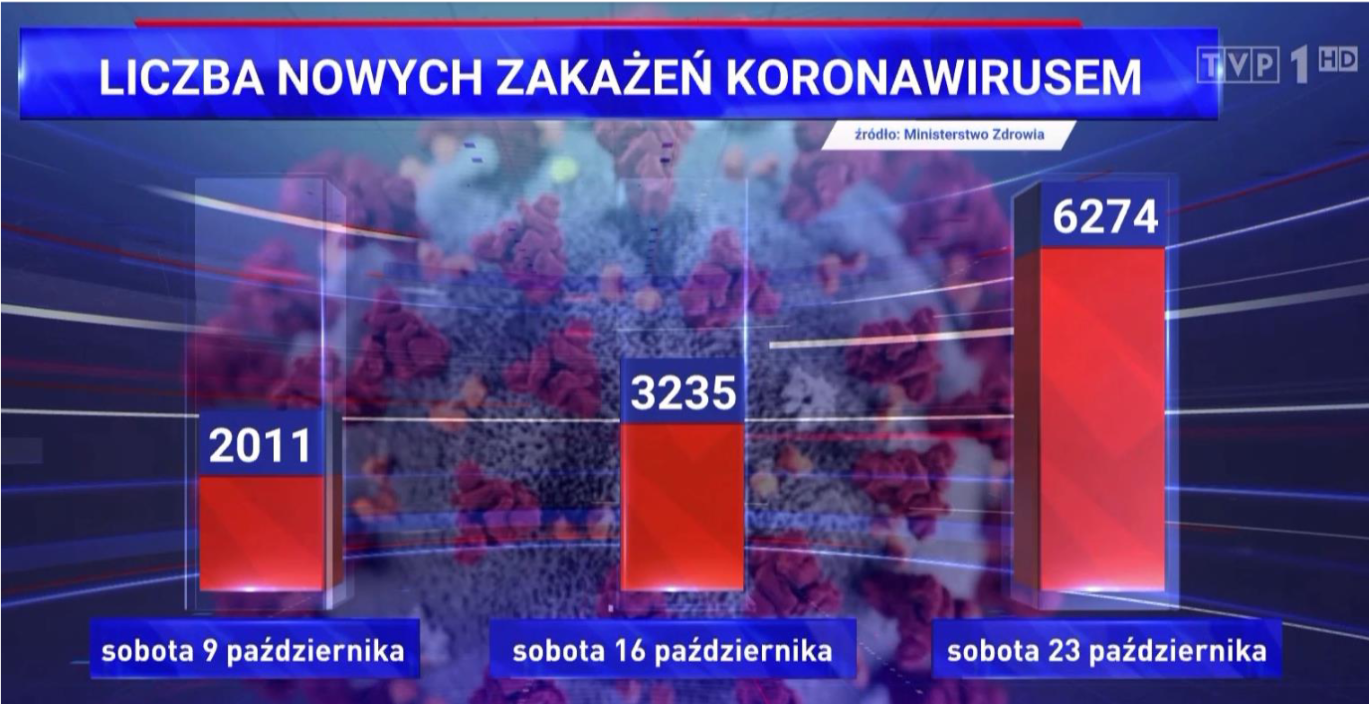

Wykres stworzony przy użyciu ggplot pochodzi z pracy domowej:
https://github.com/mini-pw/2022ZDataVisualizationTechniques/blob/main/homeworks/hw2/SokolowskiJedrzej/HW2_raport_Sokolowski.pdf
Przedstawia on te same dane co wykres z TVP1, zostały jednak poprawione pewne aspekty wykresu 1. Wykres nie jest 3D co ułatwia czytanie oraz tło jest jednolite, dzięki czemu łatwiej można odczytać watrości słupków.

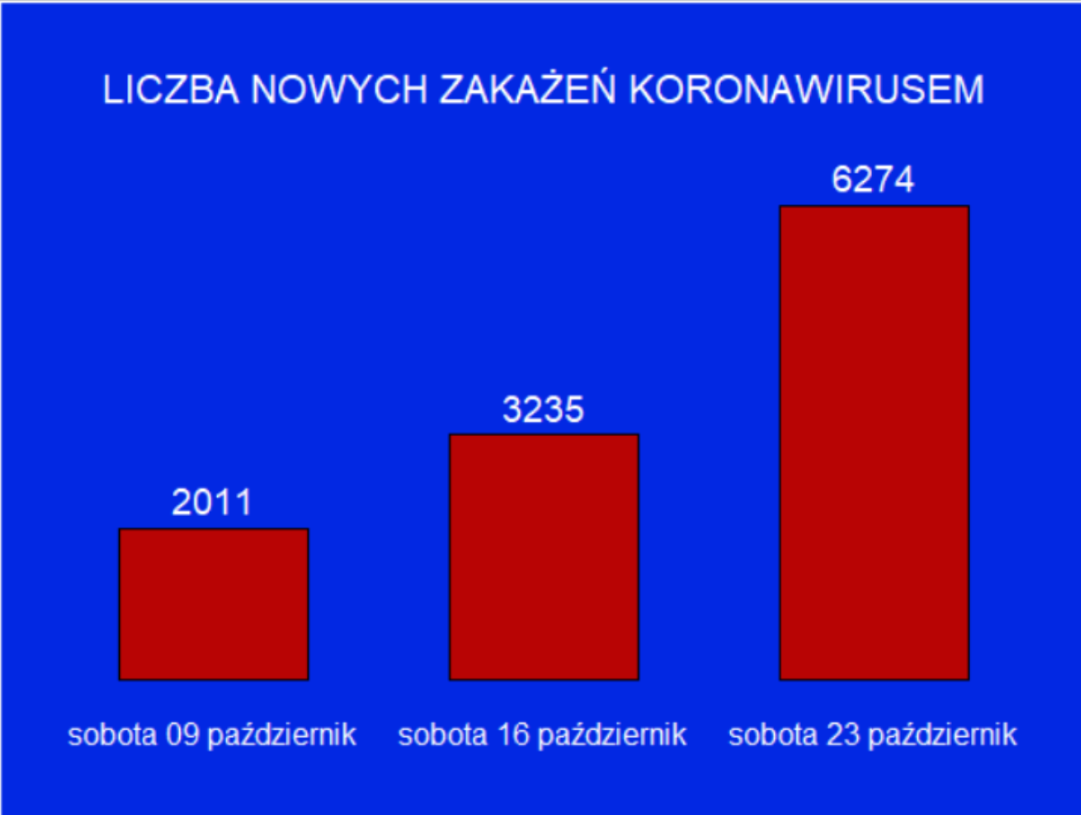

Poniżej został przedstawiony kod który posłużył do uzykania nowego wykresu, tym razem przy użyciu pakietu matplotlib z Pythona.
Różni się on od pozostałych i poprawia pewne niedociągnięcia. Została dodana podziałka na skali y, tak aby czytelnik był pewien, że prostokąty zaczynają się w 0. Dodatkowo tło zostało zmienione na biało, żeby kolory się tak nie 'gryzły'. Również informacja o dniu tygodnia danej daty zsotała usunięta, ponieważ nie była ona konieczna do interpretacji wykresu.

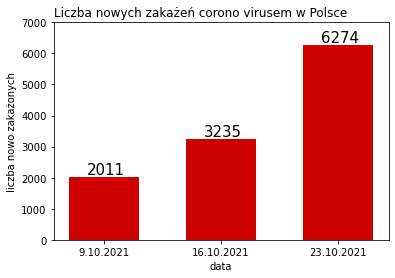

In [145]:
import matplotlib.pyplot as plt
import numpy as np
names  = ['9.10.2021', '16.10.2021', '23.10.2021']
values = [2011, 3235, 6274]

plt.bar(names, values, 0.6, color = "#CF0000")

for index, value in enumerate(values):
    plt.text(index-0.15, value+100,
             str(value), size = 15)

plt.xlabel('data')
plt.ylabel('liczba nowo zakażonych')
plt.title("Liczba nowych zakażeń corono virusem w Polsce", loc = "left")
plt.ylim(top = 7000)
plt.show()
